In [1]:
from tensorflow.keras.datasets import mnist
import math, time 
import matplotlib.pyplot as plt
#!pip install seaborn
import seaborn as sns
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold
import numpy as np
import pickle

print("Librerias importadas")

Librerias importadas


In [2]:
df = pd.read_csv("C:/Users/esteb/OneDrive - Universidad Politecnica Salesiana/7mo ciclo/Aprendizaje automatico/Practica 2/proyectoCompleto/data.csv") 
df

,Pixel_1,Pixel_2,Pixel_3,Pixel_4,Pixel_5,Pixel_6,Pixel_7,Pixel_8,Pixel_9,Pixel_10,...,Pixel_65528,Pixel_65529,Pixel_65530,Pixel_65531,Pixel_65532,Pixel_65533,Pixel_65534,Pixel_65535,Pixel_65536,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positivos
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,Negativos
2,0,0,0,0,0,0,0,0,0,1,...,7,10,15,14,6,2,8,9,11,Negativos
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positivos
4,0,0,0,0,0,0,0,2,0,0,...,2,1,2,2,2,1,0,1,1,Positivos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Negativos
3996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positivos
3997,213,152,132,128,125,142,127,125,134,137,...,91,91,91,90,90,93,89,98,154,Negativos
3998,1,1,2,2,1,0,1,1,1,1,...,0,1,1,1,1,1,1,1,1,Negativos


In [3]:
MNIST_train_small_df = df.copy()
label_encoder = LabelEncoder()
MNIST_train_small_df['class'] = label_encoder.fit_transform(MNIST_train_small_df['class'])

In [4]:
X_tr = MNIST_train_small_df.iloc[:, 0:-1] 
y_tr = MNIST_train_small_df.iloc[:, -1]
print("X_tr shape",X_tr.shape)
print("y_tr shape",y_tr.shape)

X_tr shape (4000, 65536)
y_tr shape (4000,)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_tr,y_tr,test_size=0.2, random_state=1, stratify=y_tr)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3200, 65536)
(800, 65536)
(3200,)
(800,)


In [6]:
rf_model = RandomForestClassifier(n_jobs=-1, n_estimators=120, random_state=42)

kfold = KFold(n_splits=20, shuffle=True, random_state=42)

In [11]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=120, n_jobs=-1, random_state=42)

In [12]:
scores = cross_val_score(rf_model, X_test, y_test, cv=kfold)

for fold_num, accuracy in enumerate(scores, start=1):
    print(f"Fold {fold_num}: Accuracy = {accuracy:.4f}")

Fold 1: Accuracy = 0.9250
Fold 2: Accuracy = 0.9500
Fold 3: Accuracy = 0.9750
Fold 4: Accuracy = 0.9750
Fold 5: Accuracy = 0.9500
Fold 6: Accuracy = 0.9250
Fold 7: Accuracy = 0.9500
Fold 8: Accuracy = 0.9500
Fold 9: Accuracy = 0.9750
Fold 10: Accuracy = 0.8750
Fold 11: Accuracy = 0.9250
Fold 12: Accuracy = 0.9750
Fold 13: Accuracy = 0.8750
Fold 14: Accuracy = 0.9750
Fold 15: Accuracy = 0.8750
Fold 16: Accuracy = 0.9000
Fold 17: Accuracy = 1.0000
Fold 18: Accuracy = 0.9250
Fold 19: Accuracy = 0.8750
Fold 20: Accuracy = 0.9500


In [13]:
mean_accuracy = np.mean(scores)
print(f"\nAccuracy promedio: {mean_accuracy:.4f}")


Accuracy promedio: 0.9362


In [14]:
y_pred = rf_model.predict(X_test)

In [15]:
test_acc_svm = accuracy_score(y_test, y_pred)

In [16]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9725
Precision: 0.9725118127953198
Recall: 0.9724999999999999
F1-score: 0.9724998281239258


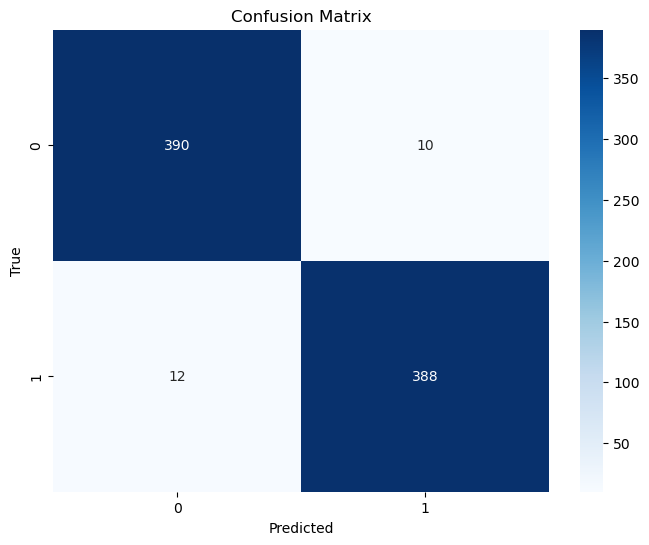

In [17]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [19]:
filename = "C:/Users/esteb/OneDrive - Universidad Politecnica Salesiana/7mo ciclo/Aprendizaje automatico/Practica 2/rf.pickle"
with open(filename, 'wb') as file:
    pickle.dump(rf_model, file)